In [4]:
import csv
import math
import string
import datetime 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.stattools as ts
import statsmodels.api as sm
from scipy.stats import linregress
from pandas_datareader import data as web

In [5]:
#Carregando a base de dados
df = pd.read_csv('IBOV.csv')
df

,Date,IBOV,BOVA11,ABEV3,AZUL4,BTOW3,B3SA3,BBAS3,BBSE3,BRML3,...,SANB11,CSNA3,SULA11,SUZB3,TAEE11,TIMP3,TOTS3,USIM5,VALE3,WEGE3
0,20070102,45382.61,0.00,2.40,0.00,61.20,0.00,10.00,0.00,0.00,...,0.00,6.37,0.00,0.00,2.06,9.25,2.43,14.70,20.51,0.00
1,20070103,44445.29,0.00,2.39,0.00,60.35,0.00,9.82,0.00,0.00,...,0.00,6.17,0.00,0.00,2.12,8.88,2.52,14.19,19.50,0.00
2,20070104,44019.77,0.00,2.39,0.00,62.46,0.00,10.18,0.00,0.00,...,0.00,6.02,0.00,0.00,2.10,8.49,2.52,14.02,19.19,0.00
3,20070105,42245.16,0.00,2.35,0.00,58.88,0.00,9.74,0.00,0.00,...,0.00,5.85,0.00,0.00,2.06,8.16,2.46,13.30,18.38,0.00
4,20070108,42829.93,0.00,2.39,0.00,58.28,0.00,9.96,0.00,0.00,...,0.00,5.95,0.00,0.00,2.08,8.10,2.42,13.43,19.07,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3357,20200731,102912.24,99.29,13.90,20.31,119.32,63.44,33.58,27.83,9.90,...,29.89,12.25,50.70,42.00,28.96,15.75,25.83,8.13,60.71,67.35
3358,20200803,102829.96,99.20,13.71,20.10,126.00,63.89,34.35,28.27,9.59,...,29.64,13.02,50.05,43.09,28.65,15.28,25.83,8.40,60.26,66.57
3359,20200804,101215.87,97.60,13.40,19.82,122.99,63.22,33.30,28.10,9.45,...,28.81,12.76,50.24,42.08,28.62,15.07,25.94,8.18,60.70,66.79
3360,20200805,102801.76,98.99,13.18,20.16,121.50,63.50,33.33,28.21,10.18,...,29.00,13.12,50.78,45.28,28.37,14.88,26.00,8.50,62.19,68.20


In [6]:
aux = []
for col in df.columns:
    if col == "Date":
        continue
    aux.append(col)
#aux

In [7]:
df["Date"] = pd.to_datetime(df["Date"], format='%Y%m%d') 
df

,Date,IBOV,BOVA11,ABEV3,AZUL4,BTOW3,B3SA3,BBAS3,BBSE3,BRML3,...,SANB11,CSNA3,SULA11,SUZB3,TAEE11,TIMP3,TOTS3,USIM5,VALE3,WEGE3
0,2007-01-02,45382.61,0.00,2.40,0.00,61.20,0.00,10.00,0.00,0.00,...,0.00,6.37,0.00,0.00,2.06,9.25,2.43,14.70,20.51,0.00
1,2007-01-03,44445.29,0.00,2.39,0.00,60.35,0.00,9.82,0.00,0.00,...,0.00,6.17,0.00,0.00,2.12,8.88,2.52,14.19,19.50,0.00
2,2007-01-04,44019.77,0.00,2.39,0.00,62.46,0.00,10.18,0.00,0.00,...,0.00,6.02,0.00,0.00,2.10,8.49,2.52,14.02,19.19,0.00
3,2007-01-05,42245.16,0.00,2.35,0.00,58.88,0.00,9.74,0.00,0.00,...,0.00,5.85,0.00,0.00,2.06,8.16,2.46,13.30,18.38,0.00
4,2007-01-08,42829.93,0.00,2.39,0.00,58.28,0.00,9.96,0.00,0.00,...,0.00,5.95,0.00,0.00,2.08,8.10,2.42,13.43,19.07,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3357,2020-07-31,102912.24,99.29,13.90,20.31,119.32,63.44,33.58,27.83,9.90,...,29.89,12.25,50.70,42.00,28.96,15.75,25.83,8.13,60.71,67.35
3358,2020-08-03,102829.96,99.20,13.71,20.10,126.00,63.89,34.35,28.27,9.59,...,29.64,13.02,50.05,43.09,28.65,15.28,25.83,8.40,60.26,66.57
3359,2020-08-04,101215.87,97.60,13.40,19.82,122.99,63.22,33.30,28.10,9.45,...,28.81,12.76,50.24,42.08,28.62,15.07,25.94,8.18,60.70,66.79
3360,2020-08-05,102801.76,98.99,13.18,20.16,121.50,63.50,33.33,28.21,10.18,...,29.00,13.12,50.78,45.28,28.37,14.88,26.00,8.50,62.19,68.20


In [8]:
data_2019 = df[(df['Date'] >= '2019-01-01') & (df['Date'] <= '2020-01-02')]
#data_2019.head()
data_2019

,Date,IBOV,BOVA11,ABEV3,AZUL4,BTOW3,B3SA3,BBAS3,BBSE3,BRML3,...,SANB11,CSNA3,SULA11,SUZB3,TAEE11,TIMP3,TOTS3,USIM5,VALE3,WEGE3
2964,2019-01-02,91012.31,87.90,15.74,36.33,42.36,26.49,45.52,24.68,12.59,...,41.51,8.59,27.17,38.18,21.89,11.61,9.46,9.51,49.77,17.58
2965,2019-01-03,91564.25,88.00,15.91,36.37,42.79,27.64,45.71,24.95,12.67,...,42.88,8.69,26.44,36.55,21.95,11.54,9.68,9.30,47.74,17.98
2966,2019-01-04,91840.79,88.50,16.13,36.25,41.37,26.64,45.71,24.70,12.43,...,42.84,9.09,25.25,37.16,22.82,11.60,9.95,9.85,50.84,18.19
2967,2019-01-07,91699.05,88.48,16.06,35.30,39.54,26.50,45.41,24.34,12.35,...,43.55,9.11,25.66,35.46,22.56,11.98,9.73,9.87,50.57,17.90
2968,2019-01-08,92031.86,88.83,15.74,34.72,41.37,26.57,44.90,23.98,12.37,...,43.23,9.14,26.25,35.81,22.42,12.43,9.34,9.59,51.06,17.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3208,2019-12-23,115863.29,111.67,18.96,57.60,62.39,45.61,51.87,34.74,18.16,...,44.96,14.51,56.36,40.04,29.68,15.30,22.43,9.44,53.17,33.56
3209,2019-12-26,117203.20,112.81,19.22,57.07,62.52,45.39,52.46,34.57,18.28,...,45.90,14.48,57.12,40.72,30.02,15.49,22.28,9.44,53.38,34.61
3210,2019-12-27,116533.98,112.17,19.16,57.80,62.19,43.02,52.24,34.64,17.98,...,46.04,13.94,57.97,40.00,29.94,15.49,21.56,9.34,53.60,35.09
3211,2019-12-30,115645.34,111.23,18.67,58.28,62.65,41.81,52.09,34.51,18.06,...,47.01,14.09,58.85,39.68,30.20,15.57,21.47,9.42,53.30,34.42


In [9]:
data_2020 = df[(df['Date'] >= '2020-01-01') & (df['Date'] <= '2021-01-01')]
#data_2020.head()

In [10]:
data_2019 = data_2019.to_numpy()
data_2019 = np.delete(data_2019, 0, 1)
#data_2019

In [11]:
data_2019

array([[91012.31, 87.9, 15.74, ..., 9.51, 49.77, 17.58],
       [91564.25, 88.0, 15.91, ..., 9.3, 47.74, 17.98],
       [91840.79, 88.5, 16.13, ..., 9.85, 50.84, 18.19],
       ...,
       [116533.98, 112.17, 19.16, ..., 9.34, 53.6, 35.09],
       [115645.34, 111.23, 18.67, ..., 9.42, 53.3, 34.42],
       [118573.1, 114.24, 19.2, ..., 9.61, 54.33, 34.99]], dtype=object)

In [12]:
data_2020 = data_2020.to_numpy()
data_2020 = np.delete(data_2020, 0, 1)
#data_2020

In [13]:
data_2020

array([[118573.1, 114.24, 19.2, ..., 9.61, 54.33, 34.99],
       [117706.66, 113.8, 18.93, ..., 9.51, 53.93, 34.55],
       [116877.92, 112.59, 19.02, ..., 9.33, 53.61, 34.64],
       ...,
       [101215.87, 97.6, 13.4, ..., 8.18, 60.7, 66.79],
       [102801.76, 98.99, 13.18, ..., 8.5, 62.19, 68.2],
       [104125.64, 100.17, 13.26, ..., 8.33, 61.83, 69.83]], dtype=object)

In [14]:
# Calculo os retornos
def calcula_retorno(dataframe):
    r, c = dataframe.shape
    data = np.zeros((r-1,c))
    for i in range(dataframe.shape[0]-1):
        for j in range(dataframe.shape[1]):
            if dataframe[i][j] == 0:
                retorno = 0
            else:
                retorno = (dataframe[i+1][j] - dataframe[i][j])/dataframe[i][j]
            #print("R = ",retorno)
            data[i][j] = retorno
            #print("Data = ",data[i][j])
    return data

In [15]:
retornos_2019 = calcula_retorno(data_2019)
#retornos_2019 = np.round(retornos_2019,2)
#retornos_2019
#retornos_2019[:,0]

In [16]:

retornos_2020 = calcula_retorno(data_2020)
#retornos_2020 = np.round(retornos_2020,2)
#retornos_2020[:,1]

In [17]:

retornos_2019 = pd.DataFrame(retornos_2019,columns = aux)
retornos_2019.shape[0]

248

In [18]:

retornos_2020 = pd.DataFrame(retornos_2020,columns = aux)
#retornos_2020

In [19]:
correlacao_2019 = retornos_2019.corr()
correlacao_2019.columns

Index(['IBOV', 'BOVA11', 'ABEV3', 'AZUL4', 'BTOW3', 'B3SA3', 'BBAS3', 'BBSE3',
       'BRML3', 'BBDC3', 'BBDC4', 'BRAP4', 'BRKM5', 'BRFS3', 'BPAC11', 'CRFB3',
       'CCRO3', 'CMIG4', 'HGTX3', 'CIEL3', 'COGN3', 'CSAN3', 'CPFE3', 'CVCB3',
       'CYRE3', 'ECOR3', 'ELET3', 'ELET6', 'EMBR3', 'ENBR3', 'EGIE3', 'EQTL3',
       'YDUQ3', 'FLRY3', 'GOAU4', 'GGBR4', 'GOLL4', 'HAPV3', 'HYPE3', 'IGTA3',
       'GNDI3', 'IRBR3', 'ITUB4', 'ITSA4', 'JBSS3', 'KLBN11', 'RENT3', 'LAME4',
       'LREN3', 'MGLU3', 'MRFG3', 'BEEF3', 'MRVE3', 'MULT3', 'NTCO3', 'BRDT3',
       'PETR3', 'PETR4', 'QUAL3', 'RADL3', 'RAIL3', 'SBSP3', 'SANB11', 'CSNA3',
       'SULA11', 'SUZB3', 'TAEE11', 'TIMP3', 'TOTS3', 'USIM5', 'VALE3',
       'WEGE3'],
      dtype='object')

In [20]:
round(correlacao_2019["IBOV"]["ITUB4"],4)

0.7412

In [21]:
correlacao_2020 = retornos_2020.corr()

In [22]:
correlacao_2020

,IBOV,BOVA11,ABEV3,AZUL4,BTOW3,B3SA3,BBAS3,BBSE3,BRML3,BBDC3,...,SANB11,CSNA3,SULA11,SUZB3,TAEE11,TIMP3,TOTS3,USIM5,VALE3,WEGE3
IBOV,1.000000,0.992479,0.714734,0.796708,0.694309,0.873779,0.902453,0.711986,0.780218,0.908576,...,0.865266,0.789606,0.787698,0.350353,0.722384,0.660520,0.756753,0.780053,0.815531,0.631141
BOVA11,0.992479,1.000000,0.710999,0.780879,0.708438,0.878404,0.897546,0.717339,0.754846,0.907023,...,0.869415,0.785990,0.787783,0.330606,0.727833,0.652393,0.746264,0.760954,0.816232,0.625197
ABEV3,0.714734,0.710999,1.000000,0.613807,0.415142,0.580090,0.601925,0.493413,0.564050,0.641146,...,0.642366,0.528688,0.513869,0.256634,0.588904,0.587852,0.500784,0.524257,0.458131,0.541000
AZUL4,0.796708,0.780879,0.613807,1.000000,0.445140,0.694269,0.725591,0.497409,0.726298,0.696453,...,0.721488,0.613555,0.694345,0.281310,0.566042,0.482360,0.630844,0.655992,0.547773,0.588294
BTOW3,0.694309,0.708438,0.415142,0.445140,1.000000,0.610628,0.577663,0.524138,0.426866,0.579170,...,0.506261,0.542086,0.575168,0.264831,0.489375,0.405056,0.586642,0.478658,0.614829,0.481134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TIMP3,0.660520,0.652393,0.587852,0.482360,0.405056,0.533453,0.559753,0.471808,0.548128,0.586684,...,0.548838,0.461178,0.515940,0.179731,0.535116,1.000000,0.497252,0.464715,0.463269,0.370558
TOTS3,0.756753,0.746264,0.500784,0.630844,0.586642,0.718073,0.691781,0.586557,0.631529,0.636223,...,0.616710,0.555495,0.626890,0.198033,0.550559,0.497252,1.000000,0.576360,0.584641,0.601490
USIM5,0.780053,0.760954,0.524257,0.655992,0.478658,0.633900,0.727499,0.540907,0.631757,0.702987,...,0.643063,0.803141,0.580606,0.280674,0.528086,0.464715,0.576360,1.000000,0.672815,0.437708
VALE3,0.815531,0.816232,0.458131,0.547773,0.614829,0.670727,0.662253,0.529059,0.471079,0.701063,...,0.633422,0.779877,0.557175,0.361379,0.549722,0.463269,0.584641,0.672815,1.000000,0.422218


In [23]:
correlacao_2019[1:-1]["IBOV"].mean()


0.5056367103582969

In [24]:
correlacao_2020[1:-1]["IBOV"].mean()

0.7715015426962277

In [25]:
correlacao_2019[1:-1]["IBOV"].min()

0.1697828744658579

In [26]:
correlacao_2020[1:-1]["IBOV"].min()

0.3503534492163706

In [27]:
print("Media: ",correlacao_2019["IBOV"].mean())
print("Minimo: ",correlacao_2019["IBOV"].min())

Media:  0.5134029893186777
Minimo:  0.1697828744658579


In [28]:
print("Media: ",correlacao_2020["IBOV"].mean())
print("Minimo: ",correlacao_2020["IBOV"].min())

Media:  0.7727256741695603
Minimo:  0.3503534492163706


Text(0, 0.5, 'Frequência')

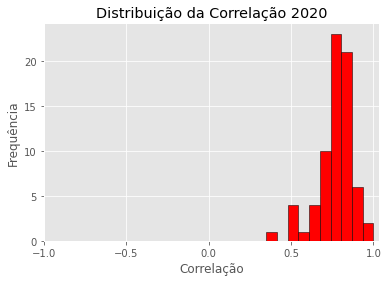

In [29]:
plt.style.use("ggplot")
aux = np.arange(-1.0, 1.5, 0.5)
ax = correlacao_2020["IBOV"].plot.hist(xticks=aux, ec = "k", color = 'red', title = 'Distribuição da Correlação 2020')
plt.xlabel("Correlação")
plt.ylabel("Frequência")

Text(0, 0.5, 'Frequência')

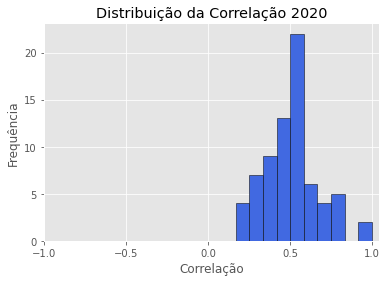

In [30]:
plt.style.use("ggplot")
aux = np.arange(-1.0, 1.5, 0.5)
ax = correlacao_2019["IBOV"].plot.hist(xticks=aux, ec = "k", color = 'royalblue', title = 'Distribuição da Correlação 2020')
plt.xlabel("Correlação")
plt.ylabel("Frequência")

In [31]:
columns = ['BOVA11', 'PETR4', 'ABEV3', 'SUZB3', 'ITSA4']
df250 = df[len(df) - 251:len(df)][columns]


In [32]:
data250 = df250.to_numpy()

In [33]:
retorno250 = pd.DataFrame(calcula_retorno(data250),columns = columns)

In [34]:
retorno250

,BOVA11,PETR4,ABEV3,SUZB3,ITSA4
0,0.006197,-0.010731,0.007014,0.004295,0.026182
1,0.013226,0.029329,-0.022388,0.023026,0.009877
2,-0.001196,-0.002732,-0.004580,-0.020579,-0.004890
3,-0.020750,-0.023875,-0.029652,0.012475,-0.035217
4,0.013855,0.013232,-0.005269,0.058690,0.025467
...,...,...,...,...,...
245,-0.019939,-0.027169,-0.044674,-0.005211,-0.021998
246,-0.000906,-0.018018,-0.013669,0.025952,0.002812
247,-0.016129,-0.000917,-0.022611,-0.023439,-0.045794
248,0.014242,0.064279,-0.016418,0.076046,-0.000979


In [35]:
retorno250.sum()

BOVA11    0.110148
PETR4     0.145928
ABEV3    -0.317191
SUZB3     0.572747
ITSA4    -0.047822
dtype: float64

In [36]:
 retorno250[columns].sum(axis=1)

0      0.032956
1      0.053069
2     -0.033977
3     -0.097019
4      0.105975
         ...   
245   -0.118990
246   -0.003830
247   -0.108891
248    0.137169
249    0.054449
Length: 250, dtype: float64

In [37]:
retorno250['Portifolio'] = retorno250[columns].sum(axis=1)*0.20
retorno250

,BOVA11,PETR4,ABEV3,SUZB3,ITSA4,Portifolio
0,0.006197,-0.010731,0.007014,0.004295,0.026182,0.006591
1,0.013226,0.029329,-0.022388,0.023026,0.009877,0.010614
2,-0.001196,-0.002732,-0.004580,-0.020579,-0.004890,-0.006795
3,-0.020750,-0.023875,-0.029652,0.012475,-0.035217,-0.019404
4,0.013855,0.013232,-0.005269,0.058690,0.025467,0.021195
...,...,...,...,...,...,...
245,-0.019939,-0.027169,-0.044674,-0.005211,-0.021998,-0.023798
246,-0.000906,-0.018018,-0.013669,0.025952,0.002812,-0.000766
247,-0.016129,-0.000917,-0.022611,-0.023439,-0.045794,-0.021778
248,0.014242,0.064279,-0.016418,0.076046,-0.000979,0.027434


In [38]:
retorno250.mean()

BOVA11        0.000441
PETR4         0.000584
ABEV3        -0.001269
SUZB3         0.002291
ITSA4        -0.000191
Portifolio    0.000371
dtype: float64

In [39]:
retorno250.std()

BOVA11        0.026977
PETR4         0.041429
ABEV3         0.026817
SUZB3         0.034291
ITSA4         0.026707
Portifolio    0.024660
dtype: float64

In [40]:
retorno250.skew()

BOVA11       -1.060548
PETR4        -1.459206
ABEV3        -0.915121
SUZB3        -0.084686
ITSA4        -0.347229
Portifolio   -1.667955
dtype: float64

In [41]:
retorno250.kurtosis()

BOVA11        10.585434
PETR4         16.718933
ABEV3          7.570052
SUZB3          4.876933
ITSA4          2.944303
Portifolio    12.842249
dtype: float64

In [42]:
retorno250.quantile(0.05)

BOVA11       -0.036755
PETR4        -0.038984
ABEV3        -0.040841
SUZB3        -0.050007
ITSA4        -0.045305
Portifolio   -0.028252
Name: 0.05, dtype: float64

In [43]:
retorno250

,BOVA11,PETR4,ABEV3,SUZB3,ITSA4,Portifolio
0,0.006197,-0.010731,0.007014,0.004295,0.026182,0.006591
1,0.013226,0.029329,-0.022388,0.023026,0.009877,0.010614
2,-0.001196,-0.002732,-0.004580,-0.020579,-0.004890,-0.006795
3,-0.020750,-0.023875,-0.029652,0.012475,-0.035217,-0.019404
4,0.013855,0.013232,-0.005269,0.058690,0.025467,0.021195
...,...,...,...,...,...,...
245,-0.019939,-0.027169,-0.044674,-0.005211,-0.021998,-0.023798
246,-0.000906,-0.018018,-0.013669,0.025952,0.002812,-0.000766
247,-0.016129,-0.000917,-0.022611,-0.023439,-0.045794,-0.021778
248,0.014242,0.064279,-0.016418,0.076046,-0.000979,0.027434


In [44]:
retorno250/retorno250.sum()

,BOVA11,PETR4,ABEV3,SUZB3,ITSA4,Portifolio
0,0.056258,-0.073539,-0.022113,0.007498,-0.547492,0.071056
1,0.120072,0.200984,0.070582,0.040203,-0.206525,0.114421
2,-0.010855,-0.018723,0.014440,-0.035930,0.102253,-0.073256
3,-0.188385,-0.163607,0.093484,0.021782,0.736412,-0.209179
4,0.125785,0.090673,0.016610,0.102471,-0.532530,0.228489
...,...,...,...,...,...,...
245,-0.181018,-0.186182,0.140841,-0.009098,0.459996,-0.256551
246,-0.008229,-0.123472,0.043094,0.045312,-0.058793,-0.008257
247,-0.146431,-0.006287,0.071286,-0.040924,0.957591,-0.234777
248,0.129297,0.440487,0.051760,0.132774,0.020481,0.295746


In [45]:
def diferenca(dataframe):
    r, c = dataframe.shape
    data = np.zeros((r-1,c))
    for i in range(dataframe.shape[0]-1):
        for j in range(dataframe.shape[1]):
            retorno = (dataframe[i+1][j] - dataframe[i][j])
            #print("R = ",retorno)
            data[i][j] = retorno
            #print("Data = ",data[i][j])
    return data

In [46]:
def acumulativa(dataframe):
    r, c = dataframe.shape
    data = np.zeros((r-1,c))
    for i in range(dataframe.shape[0]-1):
        for j in range(dataframe.shape[1]):
            retorno = (dataframe[i][j] + dataframe[i+1][j])
            #print("R = ",retorno)
            data[i][j] = retorno
            #print("Data = ",data[i][j])
    return data

In [47]:
aux = []
for col in df.columns:
    if col == "Date":
        continue
    aux.append(col)
#aux

In [48]:
data_2018 = df[(df['Date'] >= '2018-01-01') & (df['Date'] <= '2020-01-01')]

In [49]:
data_2018 = data_2018.to_numpy()
data_2018 = np.delete(data_2018, 0, 1)
retorno_2018 = calcula_retorno(data_2018)

In [50]:
diff_2018= diferenca(retorno_2018)

In [51]:
acum_2018 = acumulativa(retorno_2018)

In [52]:
retorno_2018 = pd.DataFrame(retorno_2018, columns = aux)
acum_2018 = pd.DataFrame(retorno_2018, columns = aux)
diff_2018 = pd.DataFrame(retorno_2018, columns = aux)

In [53]:
retorno_2018.columns

Index(['IBOV', 'BOVA11', 'ABEV3', 'AZUL4', 'BTOW3', 'B3SA3', 'BBAS3', 'BBSE3',
       'BRML3', 'BBDC3', 'BBDC4', 'BRAP4', 'BRKM5', 'BRFS3', 'BPAC11', 'CRFB3',
       'CCRO3', 'CMIG4', 'HGTX3', 'CIEL3', 'COGN3', 'CSAN3', 'CPFE3', 'CVCB3',
       'CYRE3', 'ECOR3', 'ELET3', 'ELET6', 'EMBR3', 'ENBR3', 'EGIE3', 'EQTL3',
       'YDUQ3', 'FLRY3', 'GOAU4', 'GGBR4', 'GOLL4', 'HAPV3', 'HYPE3', 'IGTA3',
       'GNDI3', 'IRBR3', 'ITUB4', 'ITSA4', 'JBSS3', 'KLBN11', 'RENT3', 'LAME4',
       'LREN3', 'MGLU3', 'MRFG3', 'BEEF3', 'MRVE3', 'MULT3', 'NTCO3', 'BRDT3',
       'PETR3', 'PETR4', 'QUAL3', 'RADL3', 'RAIL3', 'SBSP3', 'SANB11', 'CSNA3',
       'SULA11', 'SUZB3', 'TAEE11', 'TIMP3', 'TOTS3', 'USIM5', 'VALE3',
       'WEGE3'],
      dtype='object')

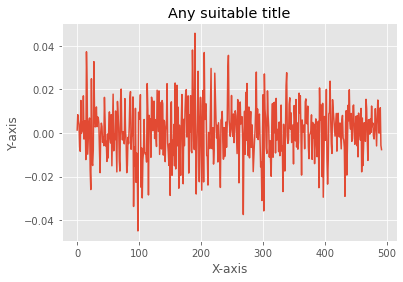

In [54]:
plt.plot(retorno_2018['IBOV'])
plt.xlabel("X-axis")  
plt.ylabel("Y-axis")  
plt.title("Any suitable title")  
plt.show() 

In [55]:
i1 = retorno_2018['IBOV'].cumsum()

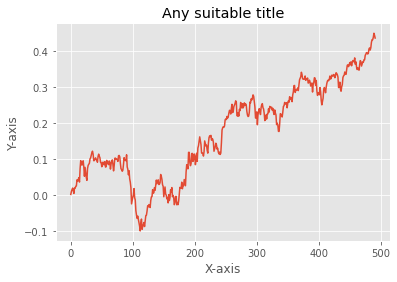

In [56]:
plt.plot(i1)
plt.xlabel("X-axis")  
plt.ylabel("Y-axis")  
plt.title("Any suitable title")  
plt.show() 

In [57]:
i2 = i1.cumsum()

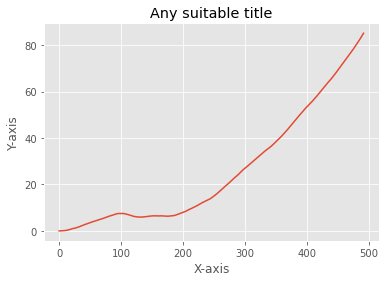

In [58]:
plt.plot(i2)
plt.xlabel("X-axis")  
plt.ylabel("Y-axis")  
plt.title("Any suitable title")  
plt.show() 

In [59]:
i3= i2.cumsum()

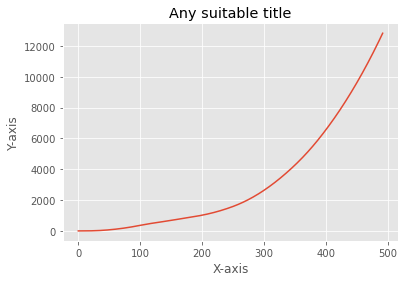

In [60]:
plt.plot(i3)
plt.xlabel("X-axis")  
plt.ylabel("Y-axis")  
plt.title("Any suitable title")  
plt.show() 

In [61]:
d2 = i3.diff()

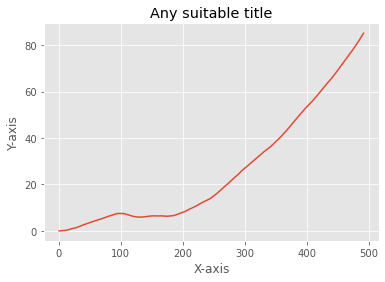

In [62]:
plt.plot(d2)
plt.xlabel("X-axis")  
plt.ylabel("Y-axis")  
plt.title("Any suitable title")  
plt.show() 

In [63]:
d1 = d2.diff()

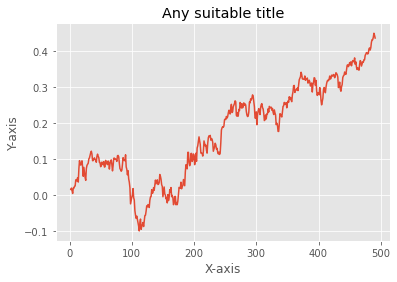

In [64]:
plt.plot(d1)
plt.xlabel("X-axis")  
plt.ylabel("Y-axis")  
plt.title("Any suitable title")  
plt.show() 

In [65]:
col = retorno_2018.columns
col

Index(['IBOV', 'BOVA11', 'ABEV3', 'AZUL4', 'BTOW3', 'B3SA3', 'BBAS3', 'BBSE3',
       'BRML3', 'BBDC3', 'BBDC4', 'BRAP4', 'BRKM5', 'BRFS3', 'BPAC11', 'CRFB3',
       'CCRO3', 'CMIG4', 'HGTX3', 'CIEL3', 'COGN3', 'CSAN3', 'CPFE3', 'CVCB3',
       'CYRE3', 'ECOR3', 'ELET3', 'ELET6', 'EMBR3', 'ENBR3', 'EGIE3', 'EQTL3',
       'YDUQ3', 'FLRY3', 'GOAU4', 'GGBR4', 'GOLL4', 'HAPV3', 'HYPE3', 'IGTA3',
       'GNDI3', 'IRBR3', 'ITUB4', 'ITSA4', 'JBSS3', 'KLBN11', 'RENT3', 'LAME4',
       'LREN3', 'MGLU3', 'MRFG3', 'BEEF3', 'MRVE3', 'MULT3', 'NTCO3', 'BRDT3',
       'PETR3', 'PETR4', 'QUAL3', 'RADL3', 'RAIL3', 'SBSP3', 'SANB11', 'CSNA3',
       'SULA11', 'SUZB3', 'TAEE11', 'TIMP3', 'TOTS3', 'USIM5', 'VALE3',
       'WEGE3'],
      dtype='object')

In [66]:
dif_retorno = pd.DataFrame()
for i in col:
    dif_retorno[i] = retorno_2018['PETR3'] - retorno_2018[i]

In [67]:
data_2018 = df[(df['Date'] >= '2018-01-01') & (df['Date'] <= '2020-01-01')]

In [68]:
diff2 = pd.DataFrame()
diff2['Date'] = data_2018['Date']

In [69]:
diff2['petr4'] = data_2018['PETR4']
petr4 = diff2['petr4'].to_numpy()

In [70]:
result = adfuller(petr4[np.isfinite(petr4)], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')   

ADF Statistic: -1.6853172247945565
n_lags: 0.43869291897344725
p-value: 0.43869291897344725
Critial Values:
   1%, -3.4438771098680196
Critial Values:
   5%, -2.867505393939065
Critial Values:
   10%, -2.569947324764179


In [71]:
petr4i0 = diff2['petr4'].diff().to_numpy()

In [72]:
result = adfuller(petr4i0[np.isfinite(petr4i0)], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')   

ADF Statistic: -8.535613017707396
n_lags: 1.0099467076419903e-13
p-value: 1.0099467076419903e-13
Critial Values:
   1%, -3.4438771098680196
Critial Values:
   5%, -2.867505393939065
Critial Values:
   10%, -2.569947324764179


In [73]:
diff2['petr3'] = data_2018['PETR3']
petr3 = diff2['petr3'].to_numpy()

In [74]:
result = adfuller(petr3[np.isfinite(petr3)], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')   

ADF Statistic: -2.25890756190103
n_lags: 0.1855636496139142
p-value: 0.1855636496139142
Critial Values:
   1%, -3.4438771098680196
Critial Values:
   5%, -2.867505393939065
Critial Values:
   10%, -2.569947324764179


In [75]:
petr3i0 = diff2['petr3'].diff().to_numpy()

In [76]:
result = adfuller(petr3i0[np.isfinite(petr3i0)], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')   

ADF Statistic: -8.561255987694391
n_lags: 8.682982866037005e-14
p-value: 8.682982866037005e-14
Critial Values:
   1%, -3.4438771098680196
Critial Values:
   5%, -2.867505393939065
Critial Values:
   10%, -2.569947324764179


In [77]:
diff2['difpetr3petr4'] = diff2['petr3'] - diff2['petr4']
petr34 = diff2['difpetr3petr4'].to_numpy()
diff2

,Date,petr4,petr3,difpetr3petr4
2719,2018-01-02,15.37,16.71,1.34
2720,2018-01-03,15.51,16.92,1.41
2721,2018-01-04,15.54,17.07,1.53
2722,2018-01-05,15.63,17.20,1.57
2723,2018-01-08,15.81,17.47,1.66
...,...,...,...,...
3207,2019-12-20,29.85,31.62,1.77
3208,2019-12-23,30.08,32.08,2.00
3209,2019-12-26,30.49,32.37,1.88
3210,2019-12-27,30.52,31.85,1.33


In [78]:
result = adfuller(petr34[np.isfinite(petr34)], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')   

ADF Statistic: -3.4324971379599893
n_lags: 0.009899690395570655
p-value: 0.009899690395570655
Critial Values:
   1%, -3.4437936797256317
Critial Values:
   5%, -2.867468682890213
Critial Values:
   10%, -2.5699277594606915


Text(0, 0.5, '')

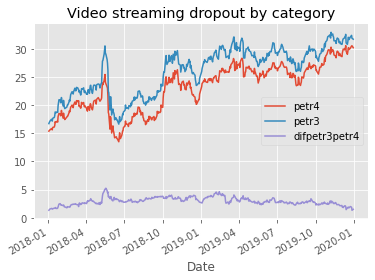

In [79]:
ax = diff2.plot.line(x = 'Date', title='Video streaming dropout by category')
ax.set_xlabel("Date")
ax.set_ylabel("")

In [80]:
data_2018 = df[(df['Date'] >= '2018-01-01') & (df['Date'] <= '2020-01-01')]
data_2018 =data_2018.dropna()

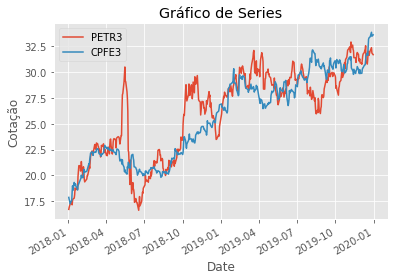

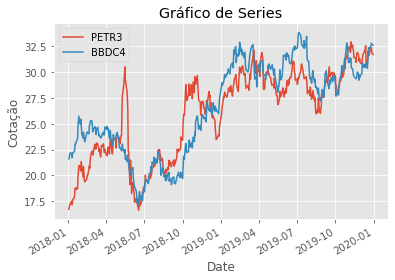

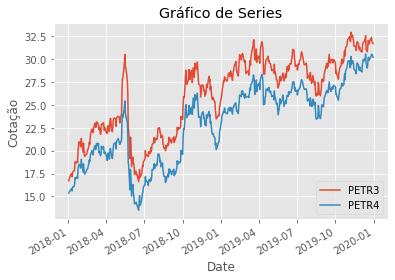

In [81]:
#col = data_2018.columns.values
col = ['CPFE3', 'BBDC4', 'PETR4']
#col = col[1:len(col)]
for i in col:
    ax = data_2018[['Date', 'PETR3', i]].plot.line(x = 'Date', title='Gráfico de Series')
    ax.set_xlabel("Date")
    ax.set_ylabel("Cotação")

In [82]:
col

['CPFE3', 'BBDC4', 'PETR4']

In [83]:
#col = data_2018.columns.values
#col = ['PETR3', 'CPFE3', 'IRBR3', 'SANB11']
col = ['CPFE3', 'BBDC4', 'PETR4']
p = []
result = {}
for i in col:
    dif_2018 = data_2018['PETR3'] - data_2018[i]
    y = dif_2018.to_numpy()
    #y = y[np.isfinite(y)]
    temp = adfuller(y)
    #temp = ts.coint(data_2018['PETR3'].to_numpy(), data_2018[i].to_numpy(), method ='aeg' )
    result.update({i: temp[1]}) 
    p.append(temp[1])
    print(i + ' ' + 'p-value:' + str(temp[1]))
    

CPFE3 p-value:0.0002781999863273143
BBDC4 p-value:0.008297125740654313
PETR4 p-value:0.009899690395570655


In [84]:
result

{'CPFE3': 0.0002781999863273143,
 'BBDC4': 0.008297125740654313,
 'PETR4': 0.009899690395570655}

In [85]:
np.min(p), col[np.argmin(p)]

(0.0002781999863273143, 'CPFE3')

In [86]:
col2 = list(col)
p = np.array(p)
col2.remove(col2[np.argmin(p)])
p = p[np.isfinite(p)]

In [87]:
p = list(p)
col2.remove(col2[np.argmin(p)])
p.remove(np.min(p))

In [88]:
data_2018['PETR3'] - data_2018['CMIG4']

2719    10.93
2720    11.19
2721    11.41
2722    11.53
2723    11.78
        ...  
3207    19.05
3208    19.46
3209    19.51
3210    18.99
3211    18.73
Length: 493, dtype: float64

In [89]:
col = data_2018.columns.values
#col = ['PETR3', 'CPFE3', 'IRBR3', 'SANB11']
col = ['CPFE3', 'BBDC4', 'PETR4']
p = []
result = {}
for i in col:
    y = data_2018[i].diff().to_numpy()
    y = y[np.isfinite(y)]
    temp = adfuller(y)
    #temp = ts.coint(data_2018['PETR3'].to_numpy(), data_2018[i].to_numpy(), method ='aeg' )
    result.update({i: temp[1]}) 
    p.append(temp[1])
    print(i + ' ' + 'p-value:' + str(temp[1]))

CPFE3 p-value:2.8497528781519835e-28
BBDC4 p-value:4.878265166875937e-17
PETR4 p-value:1.0099467076419903e-13


In [90]:
col2 = list(col)
p = np.array(p)
col2.remove(col2[np.argmin(p)])
p = p[np.isfinite(p)]
col2[np.argmin(p)], np.min(p)

('BBDC4', 2.8497528781519835e-28)

In [91]:
p = list(p)
col2.remove(col2[np.argmin(p)])
p.remove(np.min(p))
col2[np.argmin(p)], np.min(p)

('PETR4', 4.878265166875937e-17)

In [92]:
col = data_2018.columns.values
#col = ['PETR3', 'CPFE3', 'IRBR3', 'SANB11']
col = col[1:len(col)]
p = []
result = {}
for i in col:
    y = data_2018['PETR3'].to_numpy()
    y1 = data_2018[i].to_numpy()
    #y = y[np.isfinite(y)]
    temp = ts.coint(y, y1)
    #temp = ts.coint(data_2018['PETR3'].to_numpy(), data_2018[i].to_numpy(), method ='aeg' )
    result.update({i: temp[1]}) 
    p.append(temp[1])

C:\Users\leona\anaconda3\envs\PythonR\lib\site-packages\statsmodels\tsa\stattools.py:1721: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  warnings.warn(


In [93]:
result

{'IBOV': 0.03893456032560389,
 'BOVA11': 0.039079749156908955,
 'ABEV3': 0.44068143605029053,
 'AZUL4': 0.03925908005240636,
 'BTOW3': 0.14806278323957545,
 'B3SA3': 0.058276516713602226,
 'BBAS3': 0.012898562398329557,
 'BBSE3': 0.06140196693906509,
 'BRML3': 0.032143235804934195,
 'BBDC3': 0.02717837671719407,
 'BBDC4': 0.012005474670790817,
 'BRAP4': 0.3013645100737638,
 'BRKM5': 0.13411118944625128,
 'BRFS3': 0.11029593794339426,
 'BPAC11': 0.07812025020464478,
 'CRFB3': 0.028652183433133336,
 'CCRO3': 0.06288478640791878,
 'CMIG4': 0.013119084769868158,
 'HGTX3': 0.0006801083393743019,
 'CIEL3': 0.10131854528014123,
 'COGN3': 0.5201761811734341,
 'CSAN3': 0.17725357635988842,
 'CPFE3': 0.0010595201652347857,
 'CVCB3': 0.4096286988512795,
 'CYRE3': 0.08449597763898692,
 'ECOR3': 0.03306480999970538,
 'ELET3': 0.030134662627932053,
 'ELET6': 0.03324692807207837,
 'EMBR3': 0.05099079166090909,
 'ENBR3': 0.02240328946283309,
 'EGIE3': 0.005700994292213192,
 'EQTL3': 0.0331790348710682

In [94]:
col2 = list(col)

p = np.array(p)
col2.remove(col2[np.argmin(p)])
p = p[np.isfinite(p)]


In [95]:
print(col2[np.argmin(p)], np.min(p))
p = list(p)
col2.remove(col2[np.argmin(p)])
p.remove(np.min(p))

PETR4 0.0


In [96]:
result

{'IBOV': 0.03893456032560389,
 'BOVA11': 0.039079749156908955,
 'ABEV3': 0.44068143605029053,
 'AZUL4': 0.03925908005240636,
 'BTOW3': 0.14806278323957545,
 'B3SA3': 0.058276516713602226,
 'BBAS3': 0.012898562398329557,
 'BBSE3': 0.06140196693906509,
 'BRML3': 0.032143235804934195,
 'BBDC3': 0.02717837671719407,
 'BBDC4': 0.012005474670790817,
 'BRAP4': 0.3013645100737638,
 'BRKM5': 0.13411118944625128,
 'BRFS3': 0.11029593794339426,
 'BPAC11': 0.07812025020464478,
 'CRFB3': 0.028652183433133336,
 'CCRO3': 0.06288478640791878,
 'CMIG4': 0.013119084769868158,
 'HGTX3': 0.0006801083393743019,
 'CIEL3': 0.10131854528014123,
 'COGN3': 0.5201761811734341,
 'CSAN3': 0.17725357635988842,
 'CPFE3': 0.0010595201652347857,
 'CVCB3': 0.4096286988512795,
 'CYRE3': 0.08449597763898692,
 'ECOR3': 0.03306480999970538,
 'ELET3': 0.030134662627932053,
 'ELET6': 0.03324692807207837,
 'EMBR3': 0.05099079166090909,
 'ENBR3': 0.02240328946283309,
 'EGIE3': 0.005700994292213192,
 'EQTL3': 0.0331790348710682

In [97]:
p = list(p)
col2.remove(col2[np.argmin(p)])
p.remove(np.min(p))
col2[np.argmin(p)], np.min(p)

('HGTX3', 0.0006801083393743019)

In [98]:
xdata = data_2018['PETR3']
ydata = data_2018['CPFE3']
xbar = np.mean(xdata) # cálculo da média de xdata
ybar = np.mean(ydata)  # cálculo da média de ydata

a = np.sum(xdata*(ydata-ybar))/np.sum(xdata*(xdata-xbar)) #coef. angular estimado
b = ybar - a*xbar #coeficiente linear estimado

In [99]:
a,b
yest = a*xdata + b # função estimada

In [100]:
col = ['CPFE3', 'BBDC4', 'PETR4']

p = []
result = {}
for i in col:
    xdata = data_2018['PETR3']
    ydata = data_2018[i]
    a2, b2, r2, p_value, std_err = linregress(xdata, ydata)
    result.update({i :[a2,b2]})
    p.append(p_value)

In [101]:
result

{'CPFE3': [0.8326486142708753, 3.879952429029615],
 'BBDC4': [0.8800232056234439, 3.5690124444982168],
 'PETR4': [0.9761962514387985, -2.3487069240733476]}

In [102]:
e = {}
col = ['CPFE3', 'BBDC4', 'PETR4']
for i in col:
    dr = pd.DataFrame()
    y_dif = data_2018[i].values
    y_ser = result[i][0]*data_2018['PETR3'].values + result[i][1]
    e = y_ser - y_dif
    dr['Residuo'] = e
    temp = adfuller(dr['Residuo'])
    print(i + ' ' + 'p-value:' + str(temp[1]))


CPFE3 p-value:0.002876072045039235
BBDC4 p-value:0.029572874156615407
PETR4 p-value:0.02673020420599554


AttributeError: 'numpy.ndarray' object has no attribute 'update'

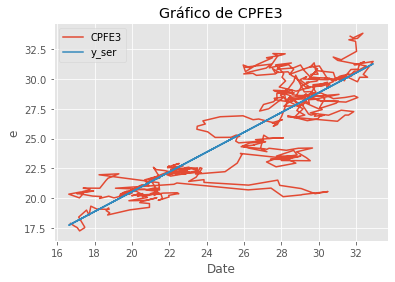

In [103]:
for i in col:
    dr = pd.DataFrame()
    dr['PETR3'] = data_2018['PETR3'].values
    dr[i] = data_2018[i].values
    #x = range(0,data_2018[i].shape[0])
    y_ser = result[i][0]*dr['PETR3'].values + result[i][1]
    dr['Residuo'] = y_dif
    dr['y_ser'] = y_ser
    
    dr['Date'] = data_2018['Date']
    
    dr['Média'] = dr['Residuo'].mean()
    ax = dr[[i, 'PETR3', 'y_ser']].plot.line(x = 'PETR3', title='Gráfico de ' + str(i))
    ax.set_xlabel("Date")
    ax.set_ylabel("e")
    e.update({i: y_dif - y_ser})

In [ ]:
for i in col:
    xdata = data_2018['PETR3'].values
    ydata = data_2018[i].values
    #x = range(0,data_2018[i].shape[0])
    y_ser = result[i][0]*data_2018['PETR3'].values + result[i][1]
    plt.figure()
    plt.plot(xdata, y_ser, 'k', label = "fitted curve with linregress")
    plt.scatter(xdata, ydata, label = "data")
    plt.xlabel("")
    plt.ylabel("")
    plt.legend()
    plt.show()

In [ ]:
dr

In [ ]:
range(0,data_2018[i].shape[0])

In [ ]:
y_ser

In [ ]:
aux = []
for col in df.columns:
    if col == "Date":
        continue
    aux.append(col)
#aux

In [ ]:
data_IB = df
data_IB = data_IB[(data_IB['Date'] >= '2019-01-01') & (data_IB['Date'] <= '2020-01-01')]
col = data_IB.columns
col = col[1:len(col)]
retorno_20 = pd.DataFrame()
for i in col:
    retorno_20[i] = data_IB[i].pct_change().dropna().values

In [ ]:
mua   = retorno_20['IBOV'].mean()
siga  = retorno_20['IBOV'].std()
sig2a = retorno_20['IBOV'].var()
mua, siga, sig2a

In [ ]:
mub   = retorno_20['BOVA11'].mean()
sigb  = retorno_20['BOVA11'].std()
sig2b = retorno_20['BOVA11'].var()
mub, sigb, sig2b

In [ ]:
sigab = retorno_20['BOVA11'].cov(retorno_20['IBOV'])
rhoab = sigab/(sigb*siga)

In [ ]:
#wa = 0.5
#wb = 0.5
wa = np.arange(0.4, 1.4, 0.1)
wb = 1 - wa
wa, wb

In [ ]:
mup = mua*wa + mub*wb

In [ ]:
sig2p = (sig2b*wb)**2 + (sig2a*wa)**2 + 2*wa*wb*sigab

In [ ]:
sigp = np.sqrt(sig2p)

In [ ]:
wamim = (sig2b - sigab)/(sig2a + sig2b - 2*sigab)

In [ ]:
data_in_sample = df[(df['Date'] >= '2019-01-01') & (df['Date'] <= '2020-01-01')]
data_out_of_sample = df[(df['Date'] >= '2020-01-01') & (df['Date'] <= '2021-01-01')]
col = data_in_sample.columns
col = col[1:len(col)]
retorno_in_sample = pd.DataFrame()
retorno_out_of_sample = pd.DataFrame()
for i in col:
    retorno_in_sample[i] = data_in_sample[i].pct_change().dropna().values
    retorno_out_of_sample[i] = data_out_of_sample[i].pct_change().dropna().values

In [ ]:
muvec_in_sample   = retorno_in_sample.mean().values
sigvec_in_sample  = retorno_in_sample.std().values
sig2vec_in_sample = retorno_in_sample.var().values

muvec_out_of_sample   = retorno_out_of_sample.mean().values
sigvec_out_of_sample  = retorno_out_of_sample.std().values
sig2vec_out_of_sample = retorno_out_of_sample.var().values

In [ ]:
a = -0.0001
b = 0.0001
wvec = np.arange(-0.0001, 0.0001, (b - a)/len(col))

In [ ]:
mupw_in_sample = np.dot(wvec, muvec)
mupw_out_of_sample = np.dot(wvec, muvec)

In [ ]:
sigmat_in_sample = retorno_in_sample.cov()
sigmat_out_of_sample = retorno_out_of_sample.cov()

sig2pw_in_sample = np.dot(np.dot(wvec.T,sigmat_in_sample),wvec)
sig2pw_out_of_sample = np.dot(np.dot(wvec.T,sigmat_out_of_sample),wvec)

In [ ]:
a = []
t = 2*sigmat_in_sample.values
r, c = np.shape(t)
a = np.array([1]*c)
t = np.column_stack((t,a))
a = np.append(a,0)
Amat_in_sample = np.vstack((t,a))
bvec = [0]*c
bvec.append(1)
bvec = np.array(bvec)
zmat = np.dot(np.linalg.inv(Amat_in_sample),bvec)

wvec2_in_sample = zmat[0:-1]
mugmim = np.dot(wvec2_in_sample, muvec)

print('Valor Esperado in_sample ' + str(mugmim))

sig2gmim = np.dot(np.dot(wvec2_in_sample.T,sigmat),wvec2_in_sample)

print('Variância in_sample ' + str(sig2gmim))

siggmim = np.sqrt(sig2gmim)

print('Desvio Padrão in_sample ' + str(siggmim))


a = []
t = 2*sigmat_out_of_sample.values
r, c = np.shape(t)
a = np.array([1]*c)
t = np.column_stack((t,a))
a = np.append(a,0)
Amat_out_of_sample = np.vstack((t,a))
bvec = [0]*c
bvec.append(1)
bvec = np.array(bvec)
zmat = np.dot(np.linalg.inv(Amat_out_of_sample),bvec)

wvec2_out_of_sample = zmat[0:-1]
mugmim = np.dot(wvec2_out_of_sample, muvec)

print('Valor Esperado out_of_sample ' + str(mugmim))

sig2gmim = np.dot(np.dot(wvec2_out_of_sample.T,sigmat),wvec2_out_of_sample)

print('Variância out_of_sample ' + str(sig2gmim))

siggmim = np.sqrt(sig2gmim)

print('Desvio Padrão out_of_sample ' + str(siggmim))


In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=80)
plt.bar(col, (wvec2_out_of_sample+wvec2_in_sample)*100/2)
plt.xlabel('Ativos') 
plt.ylabel('Pesos') 
  
# displaying the title
plt.title("Markowitz, portfolio de variância mínima global")
  
plt.xticks(rotation=90)
plt.show()